In [1]:
import numpy as np
import json, urllib.request as urlread
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler


#https://api.coinpaprika.com/v1/coins
#https://api.coinpaprika.com/v1/coins/btc-bitcoin/ohlcv/historical?start=2018-08-01&end=2019-01-20

#Zdekodowanie zawartości adresów do giełdy
def decodeJson(url):
    with urlread.urlopen(url) as url:
        decoded_json = json.loads(url.read().decode())
        
    return decoded_json

#Pobranie listy topowych 100 krytpowalut i zmiana na DataFrame
def getCoinsList():
    url = "https://api.coinpaprika.com/v1/coins"
    coin_list = pd.DataFrame(decodeJson(url), columns=['id', 'name', 'symbol']).head(100)
    
    return coin_list

#Pobranie danych o wartościach dla konkretnej kryptowaluty i zmiana na DataFrame
def getCoinStock(coin_id, start_date, end_date):
    url = "https://api.coinpaprika.com/v1/coins/%s/ohlcv/historical?start=%s&end=%s" %(coin_id, start_date, end_date)
    #Możliwe nagłówki: time_open, time_close, open, high, low, close, volume, market_cap
    coin_stock = pd.DataFrame(decodeJson(url), columns=['time_open', 'open', 'high', 'low', 'close'])
    coin_stock['time_open'] = pd.to_datetime(coin_stock.time_open)
    
    return coin_stock

In [2]:
#Pobieram listę kryptowalut
coin_list = getCoinsList()

start_date = "2018-02-15" #coinpaprika w jednym requescie oferuje dane tylko z jednego roku
end_date = "2019-02-15"
btc_stock = getCoinStock(coin_list.loc[0]['id'], start_date, end_date)

In [3]:
#Wyświetlenie listy kryptowalut
coin_list

id              name symbol
0            btc-bitcoin           Bitcoin    BTC
1             miota-iota              IOTA  MIOTA
2                eos-eos               EOS    EOS
3           eth-ethereum          Ethereum    ETH
4                xrp-xrp               XRP    XRP
5       bch-bitcoin-cash      Bitcoin Cash    BCH
6            ada-cardano           Cardano    ADA
7           ltc-litecoin          Litecoin    LTC
8                xem-nem               NEM    XEM
9                neo-neo               NEO    NEO
10           xlm-stellar           Stellar    XLM
11             dash-dash              Dash   DASH
12            xmr-monero            Monero    XMR
13      btg-bitcoin-gold      Bitcoin Gold    BTG
14  etc-ethereum-classic  Ethereum Classic    ETC
15             qtum-qtum              Qtum   QTUM
16              lsk-lisk              Lisk    LSK
17             zec-zcash             Zcash    ZEC
18             xvg-verge             Verge    XVG
19           vet-vechain           VeChain    VET
20            sc-siacoin           Siacoin     SC
21         strat-stratis           Stratis  STRAT
22          bcn-bytecoin          Bytecoin    BCN
23           steem-steem             Steem  STEEM
24     kcs-kucoin-shares     KuCoin Shares    KCS
25         bts-bitshares         BitShares    BTS
26         doge-dogecoin          Dogecoin   DOGE
27           waves-waves             Waves  WAVES
28       etn-electroneum       Electroneum    ETN
29       smart-smartcash         SmartCash  SMART
..                   ...               ...    ...
70           zen-horizen           Horizen    ZEN
71            bay-bitbay            BitBay    BAY
72      emc2-einsteinium       Einsteinium   EMC2
73            nlg-gulden            Gulden    NLG
74      lbc-lbry-credits      LBRY Credits    LBC
75           via-viacoin           Viacoin    VIA
76     etp-metaverse-etp     Metaverse ETP    ETP
77           eca-electra           Electra    ECA
78           ioc-io-coin          I/O Coin    IOC
79           burst-burst             Burst  BURST
80             rise-rise              Rise   RISE
81          thc-hempcoin          HempCoin    THC
82       cloak-cloakcoin         CloakCoin  CLOAK
83              xas-asch              Asch    XAS
84           flash-flash             Flash  FLASH
85            dct-decent            DECENT    DCT
86         mnx-minexcoin         MinexCoin    MNX
87      rvr-revolutionvr      RevolutionVR    RVR
88             aeon-aeon              Aeon   AEON
89             lkk-lykke             Lykke    LKK
90             pura-pura              Pura   PURA
91          nmc-namecoin          Namecoin    NMC
92       grs-groestlcoin       Groestlcoin    GRS
93            xsh-shield            SHIELD    XSH
94           shift-shift             Shift  SHIFT
95             sls-salus             SaluS    SLS
96         moon-mooncoin          Mooncoin   MOON
97       ftc-feathercoin       Feathercoin    FTC
98          vrc-vericoin          VeriCoin    VRC
99     xspec-spectrecoin       Spectrecoin  XSPEC

[100 rows x 3 columns]

In [4]:
#Wyświetlenie przykładowych danych na temat BitCoina
btc_stock

time_open          open          high           low         close
0   2018-02-15   9488.320000  10234.800000   9395.580000  10166.400000
1   2018-02-16  10135.700000  10324.100000   9824.820000  10233.900000
2   2018-02-17  10207.500000  11139.500000  10149.400000  11112.700000
3   2018-02-18  11123.400000  11349.800000  10326.000000  10551.800000
4   2018-02-19  10552.600000  11273.800000  10513.200000  11225.300000
5   2018-02-20  11231.800000  11958.500000  11231.800000  11403.700000
6   2018-02-21  11372.200000  11418.500000  10479.100000  10690.400000
7   2018-02-22  10660.400000  11039.100000   9939.090000  10005.000000
8   2018-02-23   9937.070000  10487.300000   9734.560000  10301.100000
9   2018-02-24  10287.700000  10597.200000   9546.970000   9813.070000
10  2018-02-25   9796.420000   9923.220000   9407.060000   9664.730000
11  2018-02-26   9669.430000  10475.000000   9501.730000  10366.700000
12  2018-02-27  10393.900000  10878.500000  10246.100000  10725.600000
13  2018-02-28  10687.200000  11089.800000  10393.100000  10397.900000
14  2018-03-01  10385.000000  11052.300000  10352.700000  10951.000000
15  2018-03-02  10977.400000  11189.000000  10850.100000  11086.400000
16  2018-03-03  11101.900000  11528.200000  11002.400000  11489.700000
17  2018-03-04  11497.400000  11512.600000  11136.100000  11512.600000
18  2018-03-05  11532.400000  11704.100000  11443.900000  11573.300000
19  2018-03-06  11500.100000  11500.100000  10694.300000  10779.900000
20  2018-03-07  10803.900000  10929.500000   9692.120000   9965.570000
21  2018-03-08   9951.440000  10147.400000   9335.870000   9395.010000
22  2018-03-09   9414.690000   9466.350000   8513.030000   9337.550000
23  2018-03-10   9350.590000   9531.320000   8828.470000   8866.000000
24  2018-03-11   8852.780000   9711.890000   8607.120000   9578.630000
25  2018-03-12   9602.930000   9937.500000   8956.430000   9205.120000
26  2018-03-13   9173.040000   9470.380000   8958.190000   9194.850000
27  2018-03-14   9214.650000   9355.850000   8068.590000   8269.810000
28  2018-03-15   8290.760000   8428.350000   7783.050000   8300.860000
29  2018-03-16   8322.910000   8585.150000   8005.310000   8338.350000
..         ...           ...           ...           ...           ...
335 2019-01-16   3616.741217   3676.344587   3610.807045   3640.746475
336 2019-01-17   3637.569650   3663.650195   3607.683457   3662.455342
337 2019-01-18   3663.087628   3666.107648   3618.168846   3635.321505
338 2019-01-19   3636.733613   3742.532428   3635.931638   3713.715440
339 2019-01-20   3713.488270   3726.810109   3569.270543   3587.765469
340 2019-01-21   3587.014238   3591.896783   3542.829068   3559.769859
341 2019-01-22   3558.978806   3611.929867   3521.995985   3593.268962
342 2019-01-23   3593.507543   3606.775232   3557.301453   3577.093976
343 2019-01-24   3578.886450   3606.671455   3558.766425   3593.398619
344 2019-01-25   3594.025874   3603.905501   3561.686221   3588.237807
345 2019-01-26   3588.391989   3648.328378   3585.319316   3598.389020
346 2019-01-27   3596.990727   3604.046630   3551.043784   3578.085425
347 2019-01-28   3575.465062   3575.641913   3433.929359   3465.099520
348 2019-01-29   3465.837774   3469.858525   3392.178535   3438.224911
349 2019-01-30   3437.618121   3486.528209   3422.771166   3477.321782
350 2019-01-31   3476.382024   3494.097546   3437.622682   3450.112035
351 2019-02-01   3450.052234   3488.342582   3418.771090   3476.459247
352 2019-02-02   3475.037622   3503.418899   3456.718034   3503.418899
353 2019-02-03   3502.762578   3505.022931   3429.635578   3445.962480
354 2019-02-04   3449.895941   3461.902337   3431.698474   3448.243049
355 2019-02-05   3447.105562   3461.339608   3434.613375   3444.182068
356 2019-02-06   3453.067046   3457.898030   3390.177541   3405.516475
357 2019-02-07   3406.778495   3414.432061   3384.913213   3384.913213
358 2019-02-08   3387.124817   3680.359312   3377.733037   3657.051909
359 2019-02-09   3662.629959 

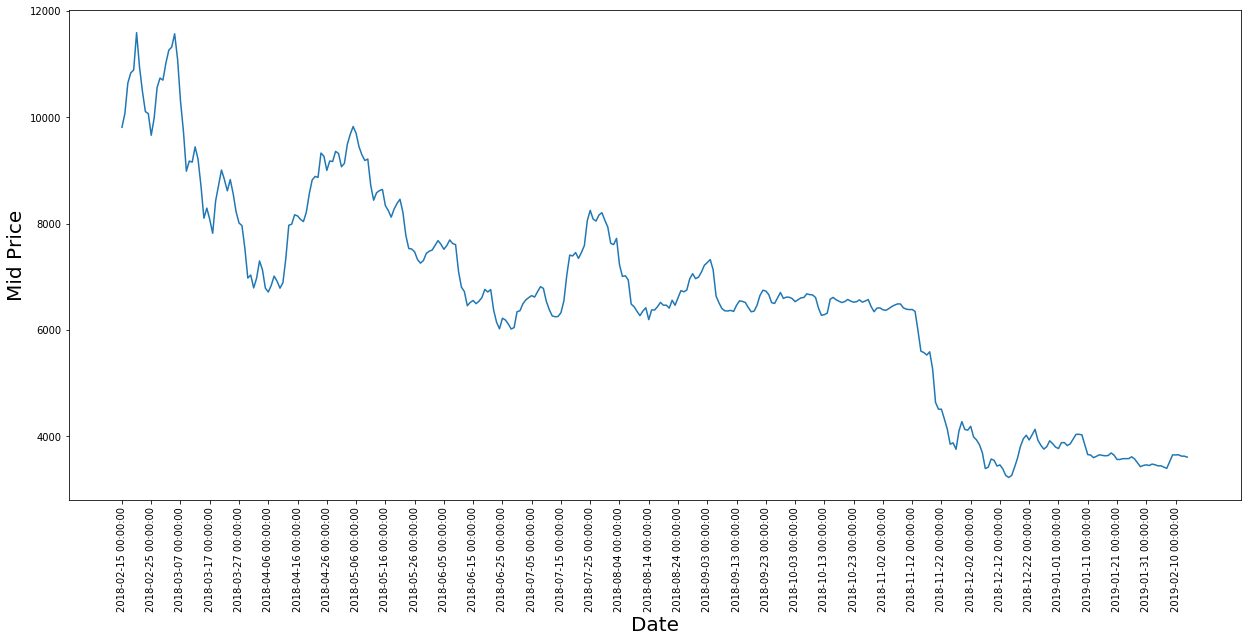

In [170]:
#Pokazuje wykres jak zmieniała się wartość krytowaluty przez okres czasu
def showGraph(stock):
    plt.figure(figsize = (21,9))
    plt.plot(range(btc_stock.shape[0]), (stock['low']+stock['high'])/2.0)
    plt.xticks(range(0, stock.shape[0], 10), stock['time_open'].loc[: : 10], rotation = 90)
    plt.xlabel('Date', fontsize = 20)
    plt.ylabel('Mid Price', fontsize = 20)
    plt.show()
    
showGraph(btc_stock)

In [ ]:
def predictStock(stock):
    high_prices = stock.loc[:,'high'].values
    low_prices = stock.loc[:,'low'].values
    mid_prices = (high_prices + low_prices)/2.0

    train_data = mid_prices[: 334]
    test_data = mid_prices[334: ]

In [239]:
scaler = MinMaxScaler()
train_data = train_data.reshape(-1, 1)
test_data = test_data.reshape(-1, 1)

In [240]:
# Train the Scaler with training data and smooth data
smoothing_window_size = 55
for x in range(0, 220, smoothing_window_size):
    scaler.fit(train_data[x: x + smoothing_window_size, :])
    train_data[x: x + smoothing_window_size, :] = scaler.transform(train_data[x: x + smoothing_window_size, :])

# You normalize the last bit of remaining data
scaler.fit(train_data[x + smoothing_window_size:, :])
train_data[x + smoothing_window_size:, :] = scaler.transform(train_data[x + smoothing_window_size:, :])

In [241]:
# Reshape both train and test data
train_data = train_data.reshape(-1)

# Normalize test data
test_data = scaler.transform(test_data).reshape(-1)

In [242]:
#Obliczanie wykładniczej średniej ruchomej (EMA) do wygładzenia danych
#smoothing_factor = 2/(1+liczba_dni). Ze względu na bardzo małą próbkę danych *100 dla uzyskania znormalizowanych wyników

EMA = 0.0
smoothing_factor = (2/(1+334))*100
for x in range(334):
    EMA = train_data[x] * smoothing_factor + EMA * (1 - smoothing_factor) 
    train_data[x] = EMA

In [243]:
# Used for visualization and test purposes
all_mid_data = np.concatenate([train_data, test_data], axis = 0)

In [244]:


window_size = 3
N = train_data.size
std_avg_predictions = []
std_avg_x = []
mse_errors = []

for pred_idx in range(window_size, N):
    if pred_idx >= N:
        date = dt.datetime.strptime(k, '%Y-%m-%d').date() + dt.timedelta(days = 1)
    else:
        date = btc_stock.loc[pred_idx, 'time_open']

    std_avg_predictions.append(np.mean(train_data[pred_idx-window_size: pred_idx]))
    mse_errors.append((std_avg_predictions[-1] - train_data[pred_idx]) ** 2)
    std_avg_x.append(date)

print('MSE error for standard averaging: %.5f' %(0.5 * np.mean(mse_errors)))

MSE error for standard averaging: 0.00490


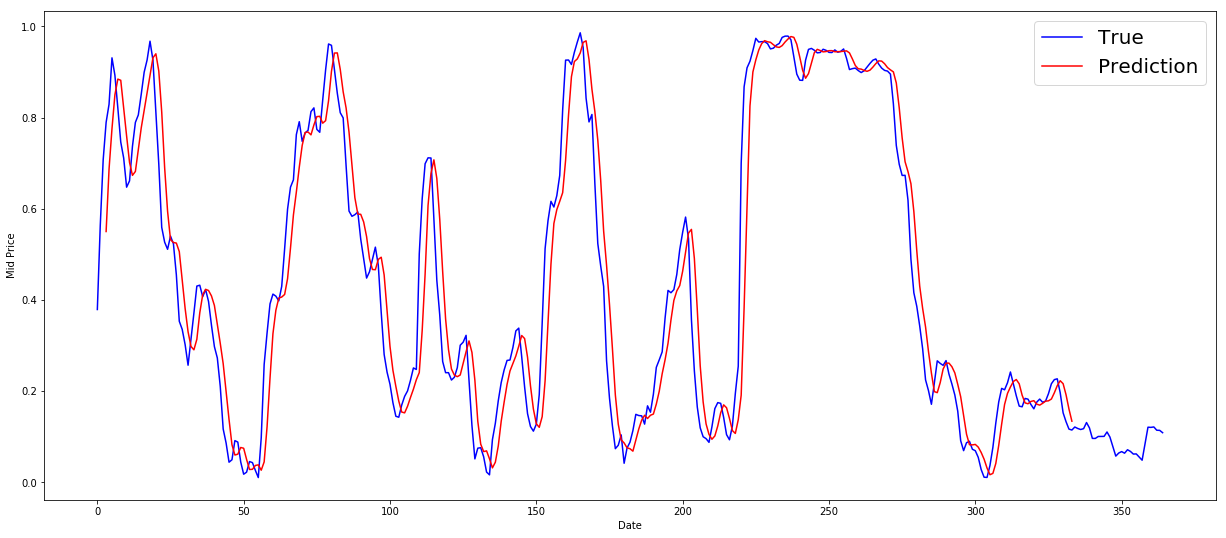

In [245]:
plt.figure(figsize = (21,9))
plt.plot(range(btc_stock.shape[0]), all_mid_data, color = 'b', label = 'True')
plt.plot(range(window_size,N), std_avg_predictions, color = 'red', label = 'Prediction')
plt.xlabel('Date')
plt.ylabel('Mid Price')
plt.legend(fontsize = 20)
plt.show()